In [1]:
# https://medium.com/@hqtquynhtram/build-a-linear-support-vector-machine-model-from-scratch-with-python-157d86812e61
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html   
# https://github.com/ShoaibSikander/SVM-from-scratch-in-Python-for-Binary-Classification 德国巴基斯坦人
# https://github.com/HarmanDotpy/ML-Assignment2
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

iris_df = datasets.load_iris()
df = pd.DataFrame(data=iris_df.data, columns=iris_df.feature_names)
df['target'] = iris_df.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = df[df.columns[:2]]
y = (df['target'] != 0) * 1
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
iris_df = datasets.load_iris()
X = iris_df['data'][:,:2]
y = (iris_df['target'] != 0) * 1

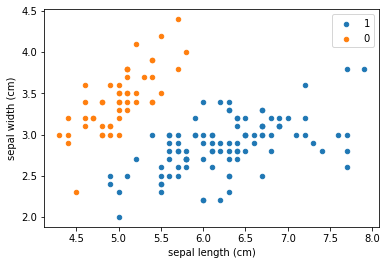

In [4]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(X[y == 1, -2], X[y == 1, -1], s=20, label='1')
plt.scatter(X[y == 0, -2], X[y == 0, -1], s=20, label='0')
plt.legend()
plt.show()

In [29]:
class SupportVectorMachine():
    def __init__(self, 
                 learning_rate = 0.001, 
                 lambda_param = 0.01 , 
                 n_tiers=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iteration=n_tiers
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y>0, 1, -1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.iteration):
            for idx, x_i in enumerate(X):
                condition =  y_[idx]*(np.dot(x_i, self.w)-self.b)>=1
                if condition:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr*y_[idx]
        
    
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
#         return np.sign(output)
        return np.int64(output > 0)
    

In [30]:
cl = SupportVectorMachine()
cl.fit(X, y)
preds = cl.predict(X)
# preds = np.int64(preds > 0)

accuracy = (preds == y).mean()
accuracy

0.9933333333333333

No handles with labels found to put in legend.


Accuracy is 0.9933333333333333


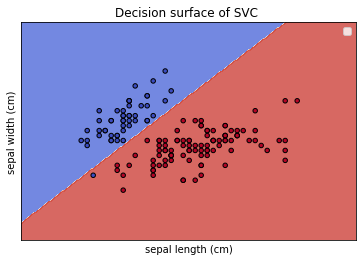

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

iris_df = datasets.load_iris()
X = iris_df['data'][:,:2]
y = (iris_df['target'] != 0) * 1

class SupportVectorMachine():
    def __init__(self, 
                 learning_rate = 0.001, 
                 lambda_param = 0.01 , 
                 n_tiers=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iteration=n_tiers
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y>0, 1, -1)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.iteration):
            for idx, x_i in enumerate(X):
                condition =  y_[idx]*(np.dot(x_i, self.w)-self.b)>=1
                if condition:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr*y_[idx]
        
    
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
#         return np.sign(output)
        return np.int64(output > 0)
    

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, cl, xx, yy, **params):
    Z = cl.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

cl = SupportVectorMachine()
cl.fit(X, y)
preds = cl.predict(X)
accuracy = (preds == y).mean()
print('Accuracy is', accuracy)

# Plot
fig, ax = plt.subplots()
title = ('Decision surface of SVC ')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, cl, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal width (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## Use lib
### Case 1: 2D plot for 2 features and using the iris dataset

No handles with labels found to put in legend.


[1 1 1 ... 2 2 2]


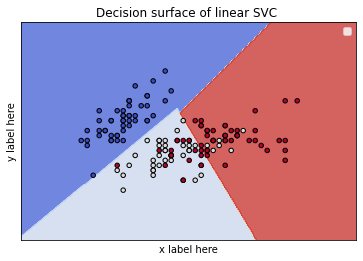

In [33]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Case 2: 3D plot for 3 features and using the iris dataset

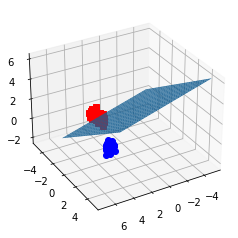

In [19]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first three features.
Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()